<a href="https://colab.research.google.com/github/Hangowoon/Newjak_ex/blob/main/c_customLoad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.utils.data as data
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from PIL import Image

In [37]:
imgsize = 128
img_dir = "drive/MyDrive/Colab Notebooks/my_newfloder/train1/"

### 1) train 데이터로 불러올 폴더 지정

In [38]:
import os

def MyGetInfoFromFloder(ipath):
  classes = sorted(os.listdir(ipath))
  class_to_idx = {}
  length = 0
  total_file_list = []
  total_label = []

  for i, c in enumerate(classes):
    class_to_idx.update({c: i})

    file_list = sorted(os.listdir(ipath + "/" + c))
    length += len(file_list)

    for f in file_list: 
      total_file_list.append(ipath + c + "/" + f)
      total_label.append(i)

  return classes, class_to_idx, length, total_file_list, total_label

In [39]:
classes, class_to_idx, lenght, total_file_list, total_label = MyGetInfoFromFloder(img_dir)
print(classes)
print(class_to_idx)
print(lenght)
print(total_file_list[1])
print(total_label[0])

['3F', '5F', '7F']
{'3F': 0, '5F': 1, '7F': 2}
60
drive/MyDrive/Colab Notebooks/my_newfloder/train1/3F/3F_002.jpg
0


In [40]:
"""
#함수==================================
CropImgSquare  정사각형 이미지 자르기
=======================================
"""

def CropImgSquare(img):
  # 단축 계산
  small_len = min(img.width, img.height)
  big_len = max(img.width, img.height)

  # 중심 계산
  cx = img.width/2
  cy = img.height/2

  # 단축의 반 계산
  d = small_len/2
  # 장축의 반 계산
  d2 = big_len/2

  # 구글링 : PIL image / crop
  (left, upper, right, lower) = (cx-d2, cy-d2, cx+d2, cy+d2)
  img = img.crop((left, upper, right, lower))
  
  return img

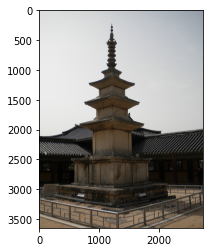

2736 3648


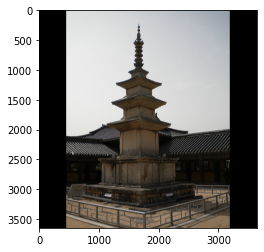

3648 3648


In [41]:
#CropImgSquare 테스트
#1. 원본 그리기
dir = img_dir + "3F/3F_001.jpg"
img = Image.open(dir)
plt.imshow(img)
plt.show()
print (img.width, img.height)

#2. 자르기
img = CropImgSquare(img)

#3. 그리기
plt.imshow(img)
plt.show()

print(img.width, img.height)

In [108]:
"""
#클래스=============================
MyImageFloder
====================================
"""

class MyImageFolder(Dataset):
  def __init__(self, ipath, 
               transform = transforms.ToTensor()):
    self.classes, self.class_to_idx, self.length, self.flist, self.labels = MyGetInfoFromFloder(ipath)
    self.root_dir = ipath
    self.transform = transform

  def __len__(self):
    return self.length

  def __getitem__(self, idx):

    # 원본 이미지
    img = Image.open(self.flist[idx])

    # 이미지 예외처리 
    if(img.mode != "RGB"):
      img = img.convert(mode = "RGB")

    # 변형된 이미지
    img_dist = self.transform(img)

    # 이미지 자르기
    img = CropImgSquare(img) 

    # 이미지 조정 (128x128)
    img = self.transform(img)

    # label
    label = self.labels[idx]

    #return img  #, label
    return img, label, img_dist


## 2) train 데이터 정보 출력 + 시각화

In [109]:
# Dataset_folder 호출 테스트

my_train = MyImageFolder(img_dir, 
                         transforms.Compose([transforms.Resize((imgsize, imgsize)),
                         transforms.ToTensor()]
                         ))

In [110]:
nclass = len(my_train.classes)
print("# of classes(클래스 개수): %d" %nclass)
print("클래스 이름:", my_train.classes)
print("클래스별 인덱스:", my_train.class_to_idx)
print("my_train 개수:", len(my_train))  # my_train.__len__()

# of classes(클래스 개수): 3
클래스 이름: ['3F', '5F', '7F']
클래스별 인덱스: {'3F': 0, '5F': 1, '7F': 2}
my_train 개수: 60


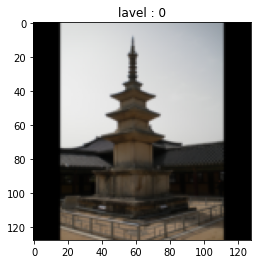

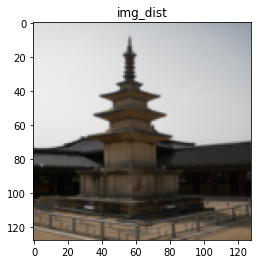

torch.Size([128, 128, 3])


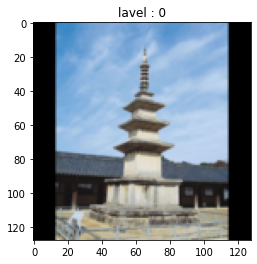

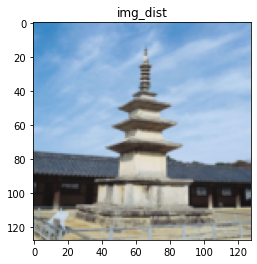

torch.Size([128, 128, 3])


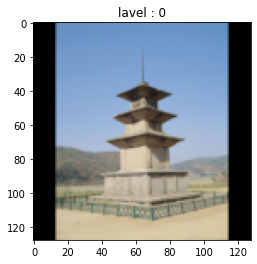

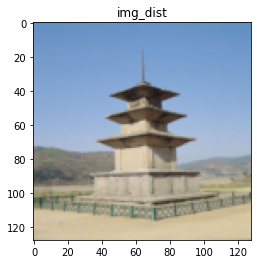

torch.Size([128, 128, 3])


In [111]:
# train 데이터 그리기

for i in range(3):
  img = my_train[i][0]  #[0] # my_train.__getitem__(i)
  img = np.transpose(img, (1,2,0))

  plt.title("lavel : %d" %my_train[i][1]) 
  plt.imshow(img)
  plt.show()
  
  # 추가 시각화
  img = my_train[i][2]  #[0] # my_train.__getitem__(i)
  img = np.transpose(img, (1,2,0))

  plt.title("img_dist") 
  plt.imshow(img)
  plt.show()

  print(img.shape) #print(img.size)

### 3) 데이터 로드하기

In [95]:
batch_size = 3

In [96]:
train_loader = data.DataLoader(my_train, 
                               batch_size = batch_size, 
                               shuffle = False, #섞음
                               num_workers=2,  #코어 개수
                               drop_last = True) #나머지 버림

[0]
한번에 로드되는 데이터 크기: 3
torch.Size([3, 3, 128, 128])
torch.Size([3])


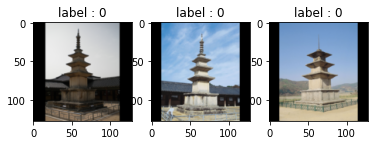

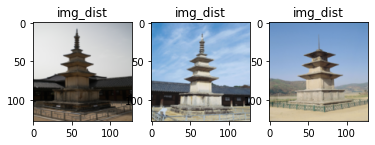

[1]
한번에 로드되는 데이터 크기: 3
torch.Size([3, 3, 128, 128])
torch.Size([3])


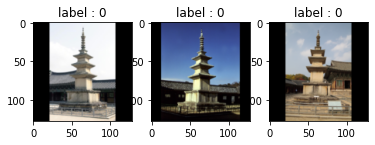

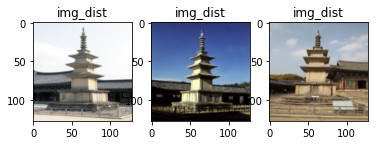

[2]
한번에 로드되는 데이터 크기: 3
torch.Size([3, 3, 128, 128])
torch.Size([3])


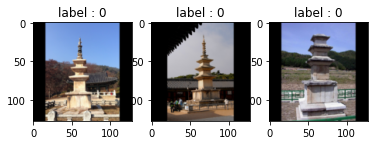

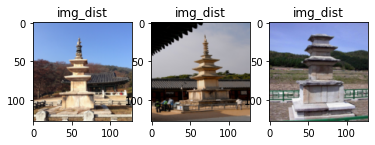

In [126]:
n = 3  #샘플 수
for i, [imgs, labels, img_dists] in enumerate(train_loader):
  if i>2:
    break

  print ("[%d]" %i)
  print ("한번에 로드되는 데이터 크기:", len(imgs))

  # GPU에 로드 
  x = Variable(imgs) #.cuda()  #(batch_size, 3, 28, 28)
  y_ = Variable(labels) #.cuda()  #(batch_size)

  print(x.shape)
  print(y_.shape)

  for j in range(n):
    img = imgs[j].numpy()
    img = np.transpose(img, (1,2,0))

    plt.subplot(1, n, j+1)
    plt.imshow(img)
    plt.title("label : %d" %labels[j])
  plt.show()
    #
  for j in range(n):
    img_dist = img_dists[j].numpy()
    img_dist = np.transpose(img_dist, (1,2,0))

    plt.subplot(1, n, j+1)
    plt.imshow(img_dist)
    plt.title("img_dist")
  plt.show()